<a href="https://colab.research.google.com/github/ReyesGus/CarPrice/blob/main/CarPriceRLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

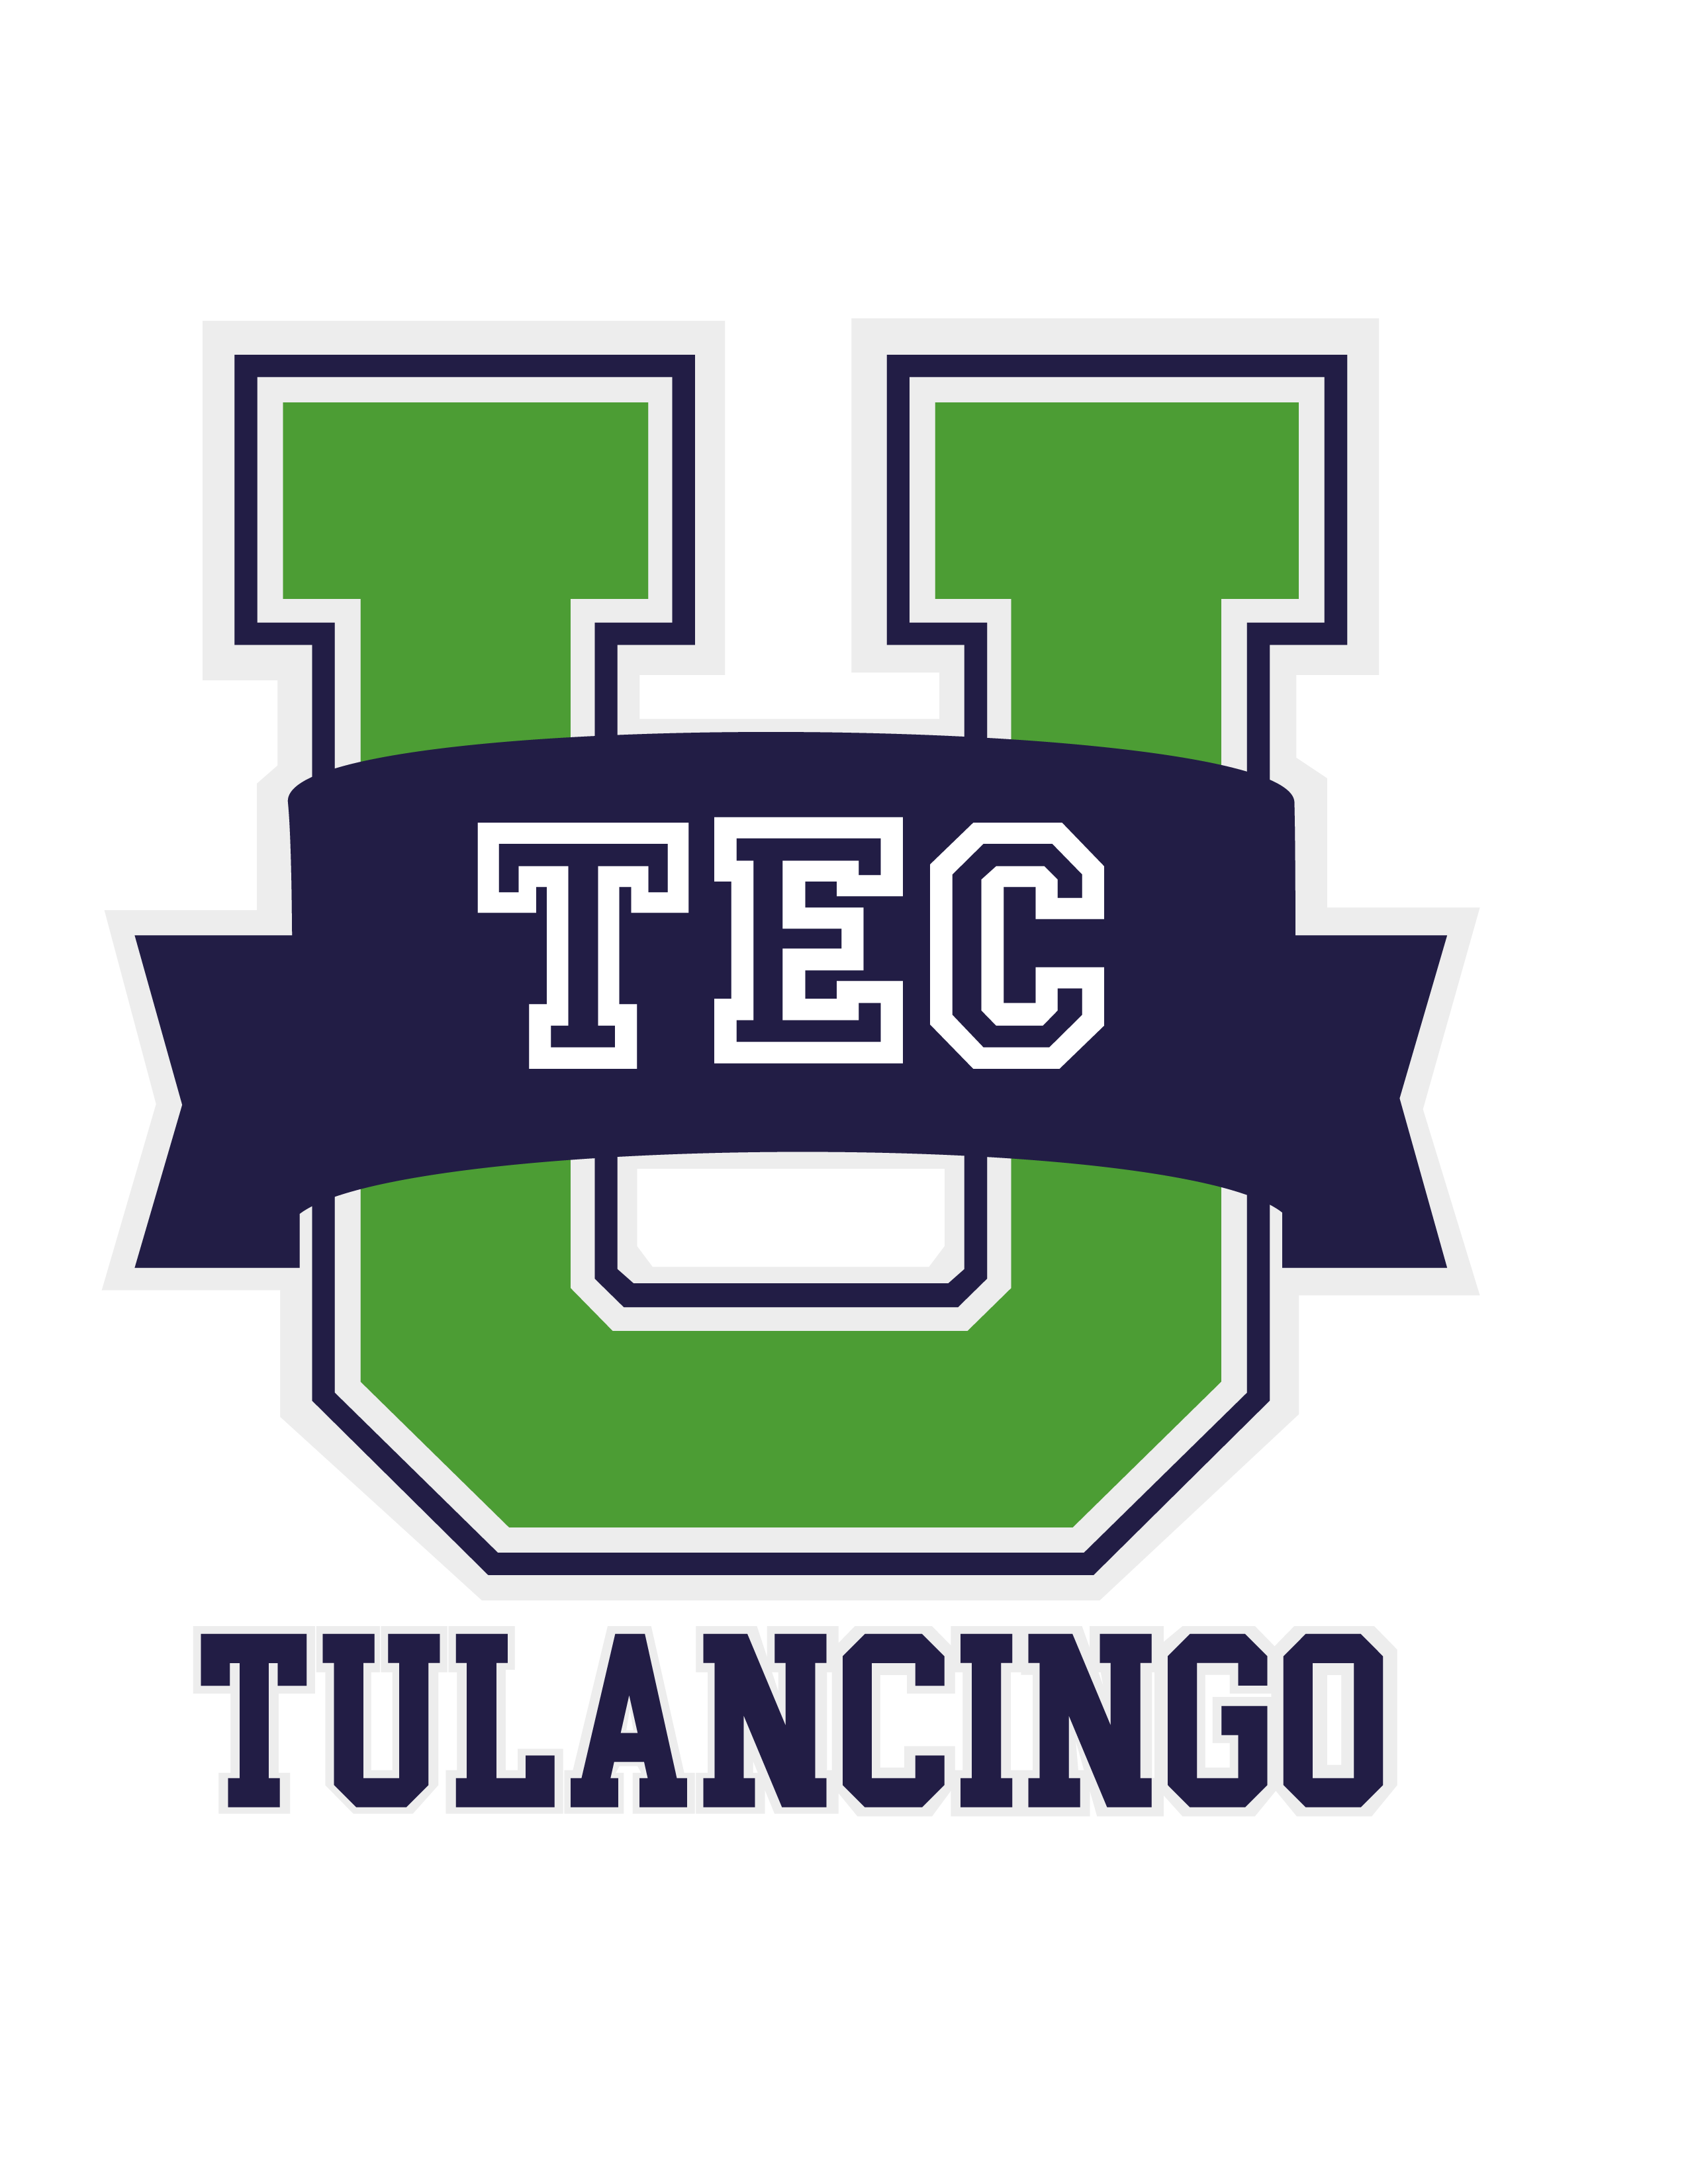

Ingeniería en desarrollo y gestión de software

91

1. De Jesus Cabrera Carlos Armando      

2. Reyes Romero Gustavo                   

3. Rodriguez Velasco Eliazar              



# Normalizar los datos

In [1]:
import numpy as np
import pandas as pd
#Librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#Liberias para modelo de regresion lineal
from joblib import dump,load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Asignar estilo a graficos de seaborns
sns.set_theme(style="darkgrid", palette="Spectral")

# Cargar dataframe

In [2]:
#Cargar Dataframe desde colab
dataframe = pd.read_csv("car_price_assignment.csv", index_col="car_ID")

In [3]:
#Obtener forma del dataframe
dataframe.shape

(205, 25)

In [4]:
#Mostrar las primeros 5 filas
dataframe.head(205)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


# Informacion del dataframe

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Limpieza de datos

#Identificacion de valores nulos

In [6]:
dataframe.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#Verificar datos duplicados
dataframe.duplicated().sum()

0

##Separacion de las columnas por categoria

In [8]:
#funcion para separar columnas por object
def categorical(dataframe):
  categorical_col = []
  for col in dataframe:
    if (dataframe[col].dtype) == 'object':
      categorical_col.append(col)

  return categorical_col

In [9]:
#mostrar columnas object
categorical_col = categorical(dataframe)
print(categorical_col)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


# Optener columnas numericas


In [10]:
#funcion para separar columnas por numero
def numerical(dataframe):
  numerical_col = []
  for col in dataframe:
    if dataframe[col].dtype != 'object':
      numerical_col.append(col)
  return numerical_col

In [11]:
#mostrar columnas numericas
numerical_col = numerical(dataframe)
print(numerical_col)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


#Correcion de entrada de datos inconsistentes

In [13]:
# Función para conocer los valores unicos de las columnas.
def uniqueData(df, col):
  # Obtener todos los valores unicos en la columna
  lista_unica = df[col].unique()

  # Ordenar alfabeticamente y mostrar datos
  lista_unica.sort()
  print("\nColumna: ", col)
  print("No. columnas unicas: ", lista_unica.size)
  print("Valores unicos: ", lista_unica)

In [14]:
#Mostrar los datos unicos de cada columna
for col in (categorical_col):
  uniqueData(dataframe, col)


Columna:  CarName
No. columnas unicas:  147
Valores unicos:  ['Nissan versa' 'alfa-romero Quadrifoglio' 'alfa-romero giulia'
 'alfa-romero stelvio' 'audi 100 ls' 'audi 100ls' 'audi 4000' 'audi 5000'
 'audi 5000s (diesel)' 'audi fox' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw x4'
 'bmw x5' 'bmw z4' 'buick century' 'buick century luxus (sw)'
 'buick century special' 'buick electra 225 custom'
 'buick opel isuzu deluxe' 'buick regal sport coupe (turbo)'
 'buick skyhawk' 'buick skylark' 'chevrolet impala'
 'chevrolet monte carlo' 'chevrolet vega 2300' 'dodge challenger se'
 'dodge colt (sw)' 'dodge colt hardtop' 'dodge coronet custom'
 'dodge coronet custom (sw)' 'dodge d200' 'dodge dart custom'
 'dodge monaco (sw)' 'dodge rampage' 'honda accord' 'honda accord cvcc'
 'honda accord lx' 'honda civic' 'honda civic (auto)' 'honda civic 1300'
 'honda civic 1500 gl' 'honda civic cvcc' 'honda prelude' 'isuzu D-Max '
 'isuzu D-Max V-Cross' 'isuzu MU-X' 'jaguar xf' 'jaguar xj' 'jaguar xk'
 'maxda glc delux

In [15]:
#funcion para convertir valores a minusculas y eliminar espacios blancos al inicio y final de los valores
def correctionData(df, col):
  # Convertir los valores a minusculas de la columna CarName
  df[col] = df[col].str.lower()

  # Eliminar los espacios en blanco al inicio y final de los valores
  df[col] = df[col].str.strip()
  print("Corrección de datos ", col, " realizada!")

In [16]:
# Convertir a minusculas y eliminar espacios en blanco a los datos object
for col in (categorical_col):
  correctionData(dataframe, col)

Corrección de datos  CarName  realizada!
Corrección de datos  fueltype  realizada!
Corrección de datos  aspiration  realizada!
Corrección de datos  doornumber  realizada!
Corrección de datos  carbody  realizada!
Corrección de datos  drivewheel  realizada!
Corrección de datos  enginelocation  realizada!
Corrección de datos  enginetype  realizada!
Corrección de datos  cylindernumber  realizada!
Corrección de datos  fuelsystem  realizada!


#Reemplazar nombre de carro por marca

In [17]:
dataframe["CarName"] = dataframe["CarName"].apply(lambda x: x.split(" ")[0])

In [18]:
#Verificar modificaciones
uniqueData(dataframe, 'CarName')


Columna:  CarName
No. columnas unicas:  27
Valores unicos:  ['alfa-romero' 'audi' 'bmw' 'buick' 'chevrolet' 'dodge' 'honda' 'isuzu'
 'jaguar' 'maxda' 'mazda' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porcshce' 'porsche' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'volvo' 'vw']


#Correción de marcas

In [19]:
dataframe.CarName.replace(to_replace="maxda", value="mazda", inplace=True)
dataframe.CarName.replace(to_replace="porcshce", value="porsche", inplace=True)
dataframe.CarName.replace(to_replace="toyouta", value="toyota", inplace=True)
dataframe.CarName.replace(to_replace="vokswagen", value="volkswagen", inplace=True)
dataframe.CarName.replace(to_replace="vw", value="volkswagen", inplace=True)
uniqueData(dataframe, 'CarName')


Columna:  CarName
No. columnas unicas:  22
Valores unicos:  ['alfa-romero' 'audi' 'bmw' 'buick' 'chevrolet' 'dodge' 'honda' 'isuzu'
 'jaguar' 'mazda' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


#Reemplazar valores de categoria por numericos

In [20]:
col_dum=['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']
for j in col_dum:
  dataframe = pd.get_dummies(dataframe, columns=[j], prefix=j, drop_first=True)

In [21]:
dataframe.doornumber.replace(to_replace="four", value=4, inplace=True)
dataframe.doornumber.replace(to_replace="two", value=2, inplace=True)

In [22]:
dataframe.cylindernumber.replace(to_replace="eight", value=8, inplace=True)
dataframe.cylindernumber.replace(to_replace="five", value=5, inplace=True)
dataframe.cylindernumber.replace(to_replace="four", value=4, inplace=True)
dataframe.cylindernumber.replace(to_replace="six", value=6, inplace=True)
dataframe.cylindernumber.replace(to_replace="three", value=3, inplace=True)
dataframe.cylindernumber.replace(to_replace="two", value=2, inplace=True)
dataframe.cylindernumber.replace(to_replace="twelve", value=12, inplace=True)

In [23]:
dataframe.head()

,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,alfa-romero,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,alfa-romero,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,2,audi,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,2,audi,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [24]:
dataframe.tail()

,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201,-1,volvo,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
202,-1,volvo,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,-1,volvo,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
204,-1,volvo,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
205,-1,volvo,4,109.1,188.8,68.9,55.5,3062,4,141,3.78,3.15,9.5,114,5400,19,25,22625.0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   CarName              205 non-null    object 
 2   doornumber           205 non-null    int64  
 3   wheelbase            205 non-null    float64
 4   carlength            205 non-null    float64
 5   carwidth             205 non-null    float64
 6   carheight            205 non-null    float64
 7   curbweight           205 non-null    int64  
 8   cylindernumber       205 non-null    int64  
 9   enginesize           205 non-null    int64  
 10  boreratio            205 non-null    float64
 11  stroke               205 non-null    float64
 12  compressionratio     205 non-null    float64
 13  horsepower           205 non-null    int64  
 14  peakrpm              205 non-null    int64  
 15  citympg              205 non-null    int

##Visualizar Datos

#Distribucion de datos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Price')

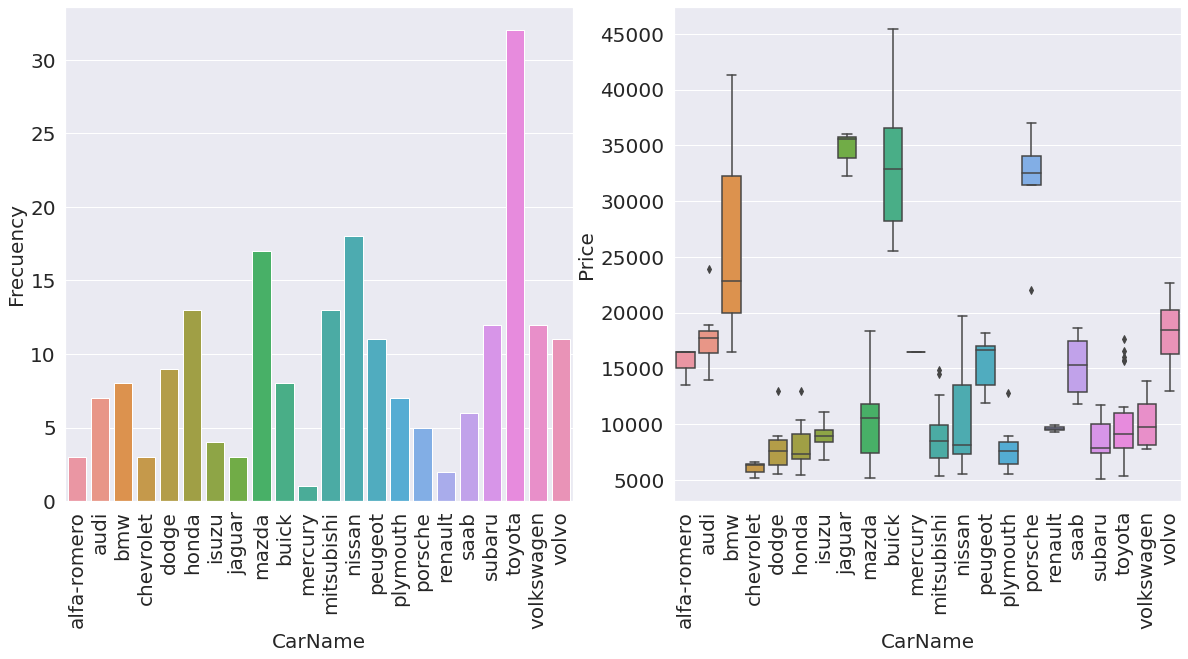

In [26]:
#Asignar tamaño
plt.figure(figsize=(20,20))
#COUNTPLOT
plt.subplot(2,2,1)
sns.countplot(dataframe["CarName"])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.xlabel("CarName", fontsize=20, )
plt.ylabel("Frecuency", fontsize=20)
#BOXPLOT
plt.subplot(2,2,2)
#Relacionar el dataframe con una columna numerica especifica
sns.boxplot(x=dataframe["CarName"], y=dataframe["price"])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.xlabel("CarName", fontsize=20, )
plt.ylabel("Price", fontsize=20)

#Tendecnia central (Medidas)

In [27]:
#Obtener las columnas numericas
numerical_col = numerical(dataframe)
print(numerical_col)

['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']


#Describir el dataset

In [28]:
dataframe.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.902439,0.180488,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.014634,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.297446,0.385535,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.120377,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#Crear nuevo dataframe para valores estadisticos de los valores numericos
df_estadistica = pd.DataFrame(columns=numerical_col, index=["Minimo", "Media", "Mediana", "Moda", "Maximo"])

#Asignar la media, moda, mediana, minimo y maximo de algunas columnas al nuevo dataframe
for name_col in numerical_col:
    var = dataframe[name_col]
    # Obtener estadísticas
    df_estadistica.at["Minimo", name_col] = var.min()
    df_estadistica.at["Media", name_col] = var.mean()
    df_estadistica.at["Mediana", name_col] = var.median()
    df_estadistica.at["Moda", name_col] = var.mode()[0]
    df_estadistica.at["Maximo", name_col] = var.max()
df_estadistica


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
Minimo,-2,2,86.6,141.1,60.3,47.8,1488,2,61,2.54,2.07,7,48,4150,13,16,5118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Media,0.834146,3.12195,98.7566,174.049,65.9078,53.7249,2555.57,4.38049,126.907,3.32976,3.25541,10.1425,104.117,5125.12,25.2195,30.7512,13276.7,0.902439,0.180488,0.0390244,0.341463,0.468293,0.121951,0.585366,0.370732,0.0146341,0.00487805,0.0585366,0.721951,0.0731707,0.0634146,0.0195122,0.321951,0.0146341,0.097561,0.00487805,0.458537,0.0439024,0.00487805
Mediana,1,4,97,173.2,65.5,54.1,2414,4,120,3.31,3.29,9,95,5200,24,30,10295,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Moda,0,4,94.5,157.3,63.8,50.8,2385,4,92,3.62,3.4,9,68,5500,31,25,5572,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Maximo,3,4,120.9,208.1,72.3,59.8,4066,12,326,3.94,4.17,23,288,6600,49,54,45400,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [30]:
#Funcion para mostrar los datos tipo numerico
def graph_numeric(df, col):
  i=1
  plt.figure(figsize=(25,400))
  for j in col:
    #DISTPLOT
    plt.subplot(len(col),2,i)
    sns.distplot(df[j], kde=True)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=90)
    plt.xlabel(j, fontsize=20, )
    plt.ylabel("Frecuency", fontsize=20)
    
    # Agregar líneas para la media, la mediana y la moda
    plt.axvline(x=df_estadistica[j]["Minimo"], color = 'gray', linestyle='dashed', linewidth = 3)
    plt.axvline(x=df_estadistica[j]["Media"], color = 'green', linestyle='dashed', linewidth = 3)
    plt.axvline(x=df_estadistica[j]["Moda"], color = 'red', linestyle='dashed', linewidth = 3)
    plt.axvline(x=df_estadistica[j]["Mediana"], color = 'blue', linestyle='dashed', linewidth = 3)
    plt.axvline(x=df_estadistica[j]["Maximo"], color = 'gray', linestyle='dashed', linewidth = 3)

    i=i+1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

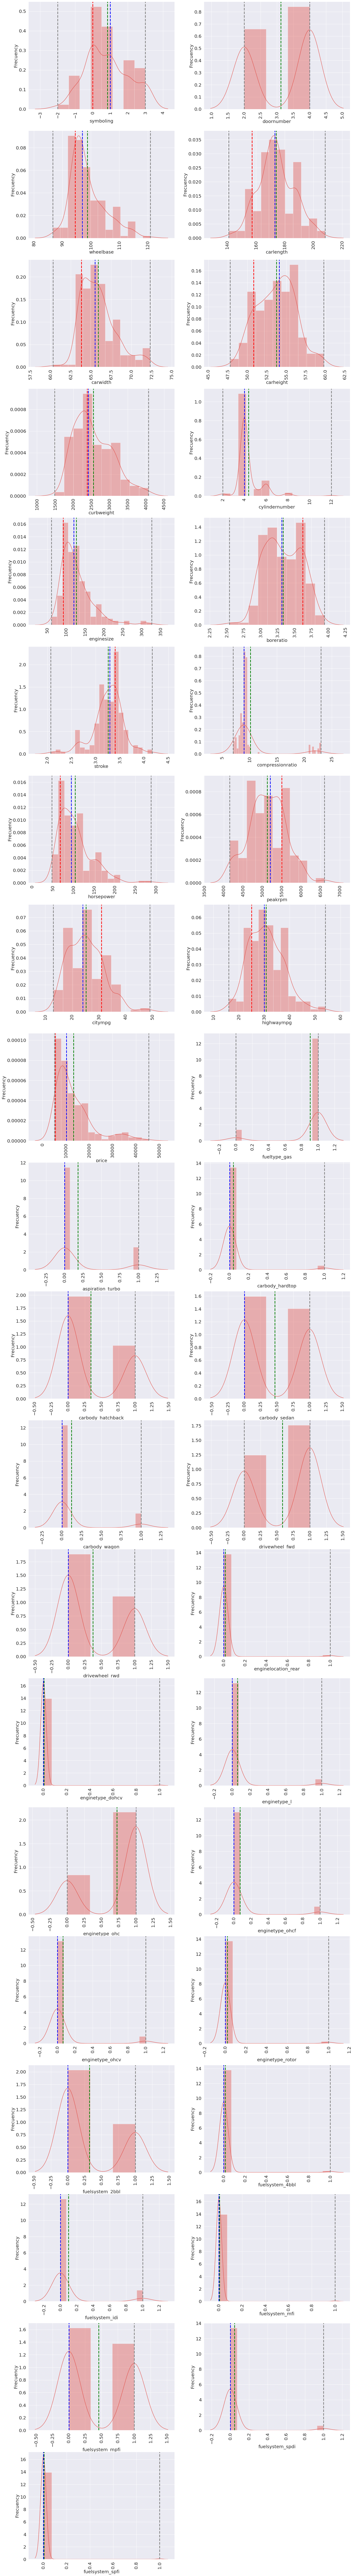

In [31]:
#Se muestran los distplot de las columnas numericas
graph_numeric(dataframe, numerical_col)